In [5]:
!conda info --envs

# conda environments:
#
base                     /home/mzouink/miniconda3
drlnd                    /home/mzouink/miniconda3/envs/drlnd
pytorch                  /home/mzouink/miniconda3/envs/pytorch
rl                       /home/mzouink/miniconda3/envs/rl
test                     /home/mzouink/miniconda3/envs/test
tf_gpu                *  /home/mzouink/miniconda3/envs/tf_gpu



In [6]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [7]:
InputPath = ""
seed = 124
X = pickle.load(open(InputPath+"X.pickle","rb"))
y = pickle.load(open(InputPath+"y.pickle","rb"))
X_t,y_c=shuffle(X,y, random_state=seed)
X = X/255.0
y = tf.keras.utils.to_categorical(y).astype(int)
print(X.shape)
print(y.shape)
print(np.amax(X))

print(np.amin(X))

(875, 50, 50, 3)
(875, 5)
1.0
0.0


In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=seed)

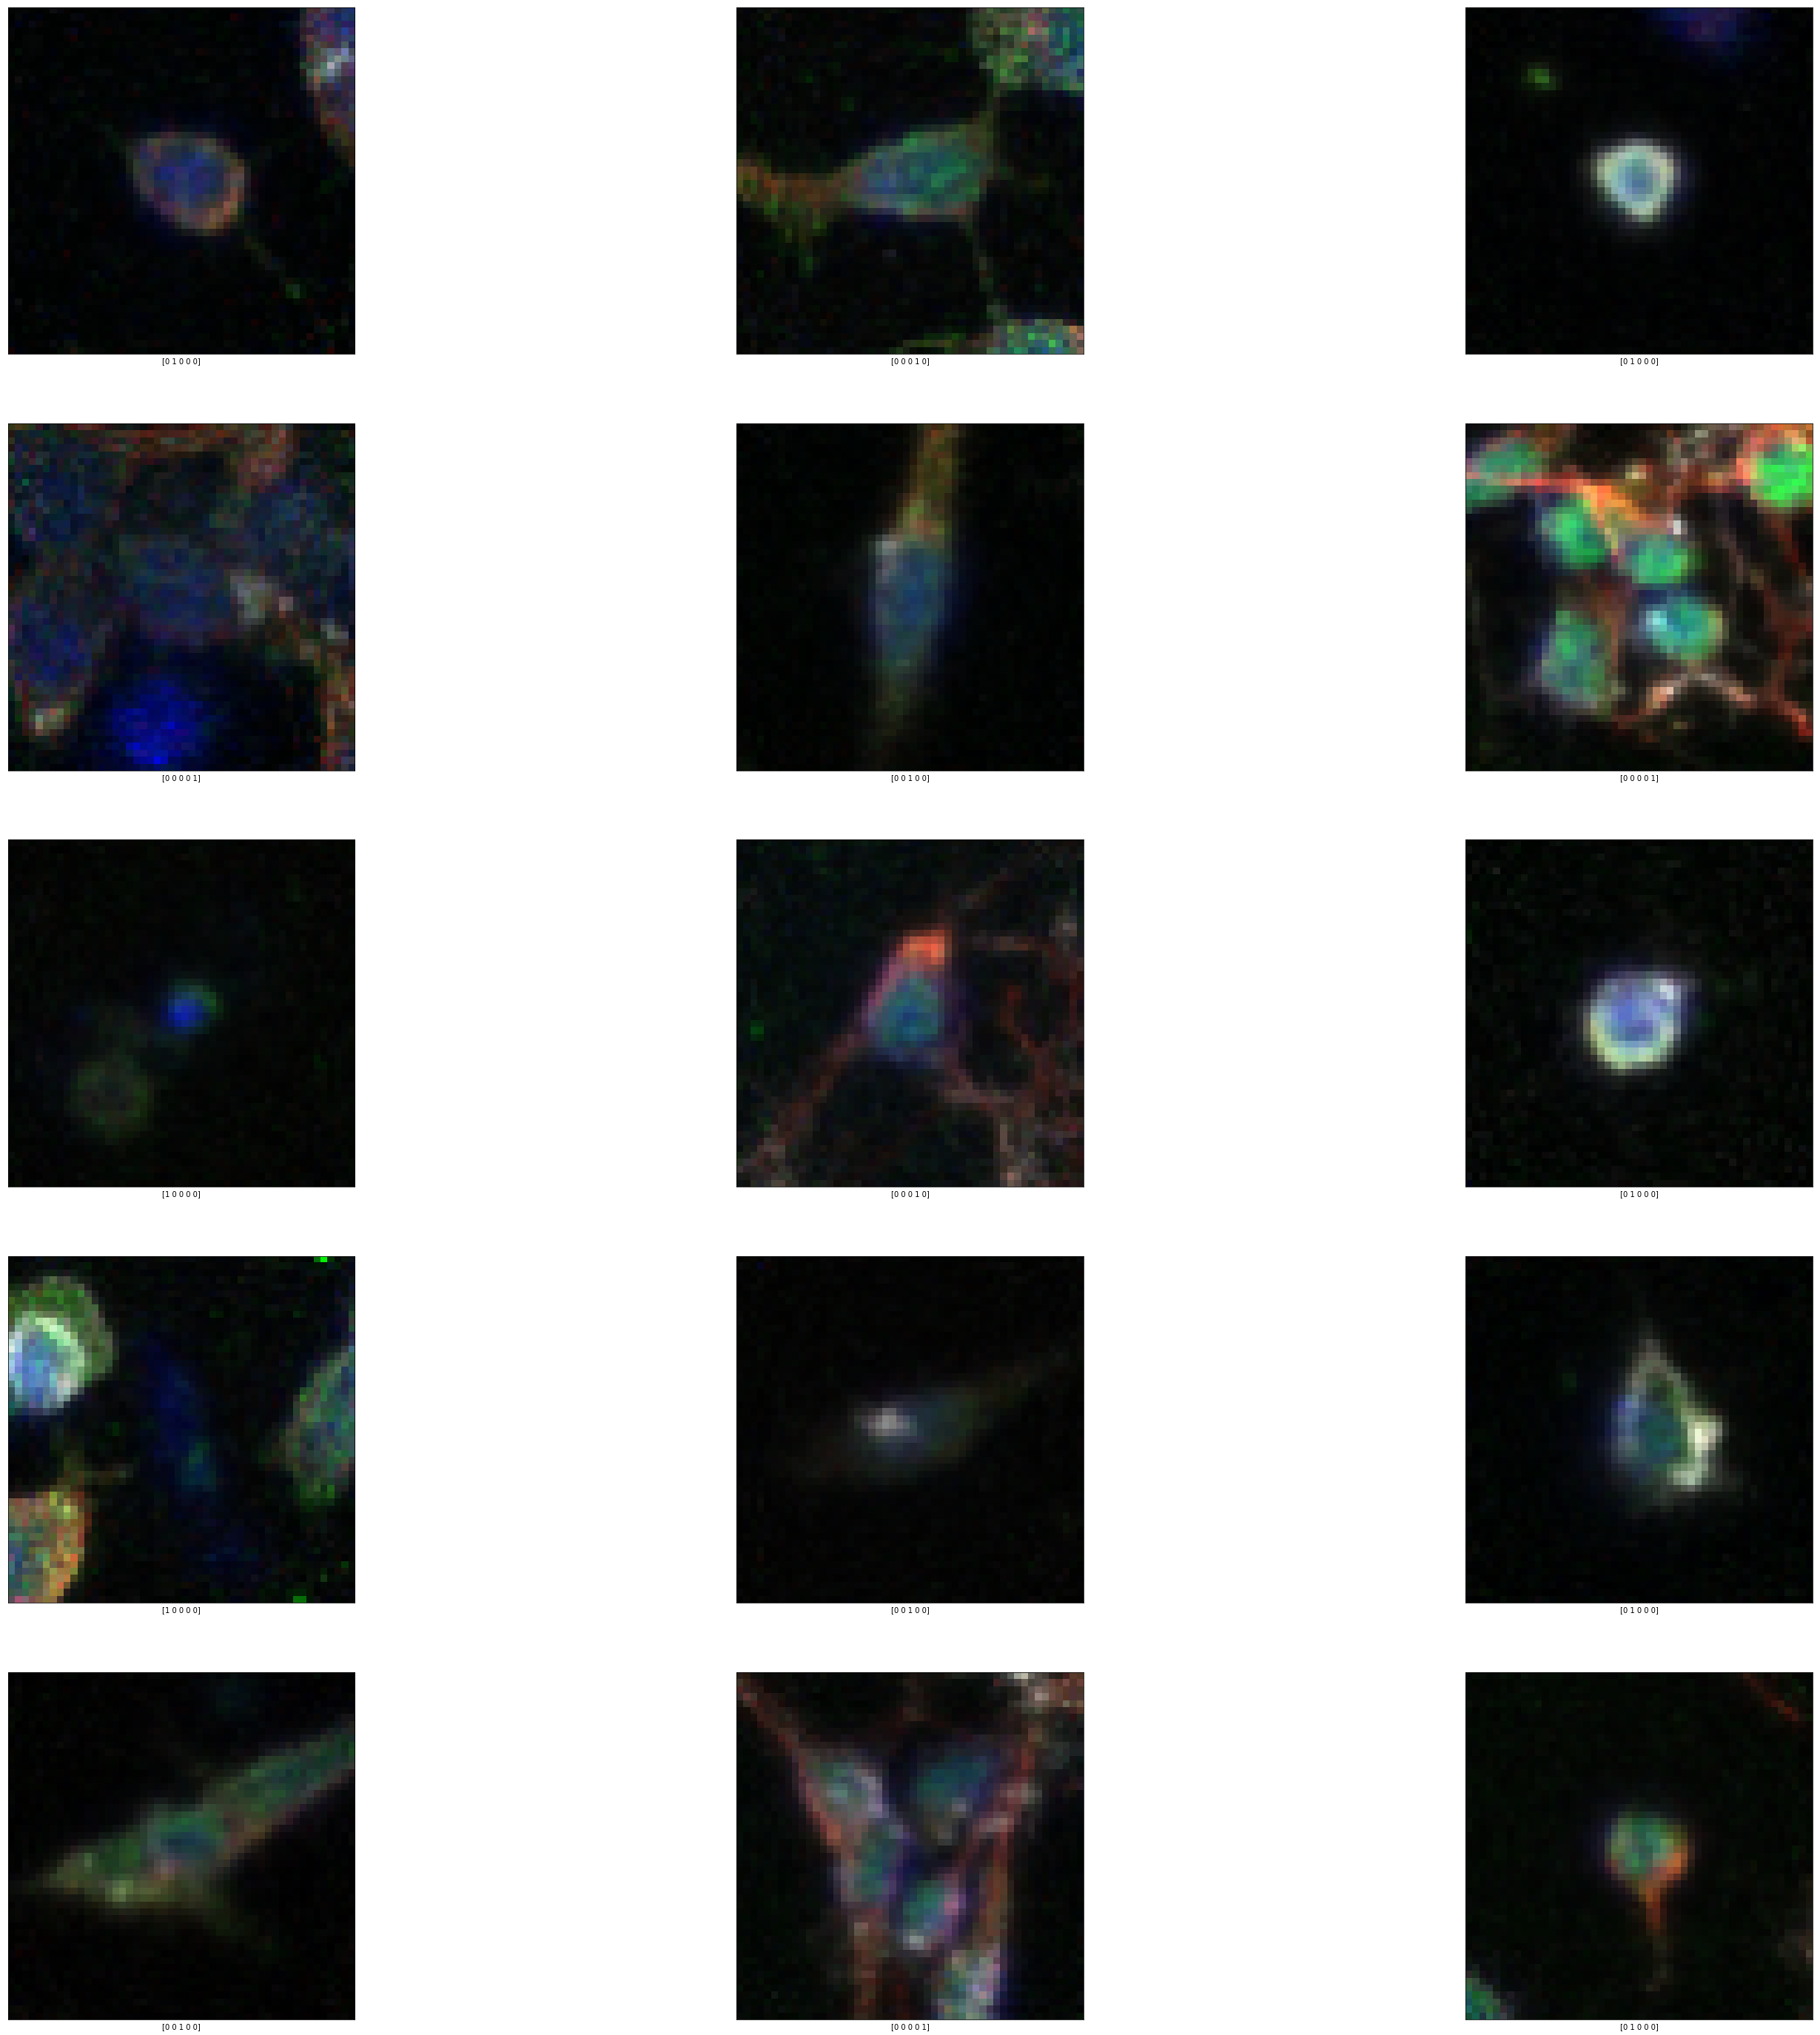

In [9]:
plt.figure(figsize=(50,50))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_y[i]))
plt.show()

In [10]:
import time
NAME = "VGG-{}".format(int(time.time()))

In [11]:
# gpu_option = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [12]:
# weights = [175, 290, 326, 220, 576]
# total = sum(weights)
# weights[:] = [x / total for x in weights]
# print(weights)
# classWeights = { i : weights[i] for i in range(0, len(weights) ) }
# classWeights

In [13]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
import cv2, numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(50,50,3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3),activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128,(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
#     print(model.summary())
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256,(3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

model = VGG_16()
# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])
adam = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)


model.compile(optimizer=adam, loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 52, 52, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 64)        1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 52, 52, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 27, 27, 64)       

In [16]:
# history = model.fit(X,y,batch_size=32, epochs = 10, validation_split=0.3, callbacks = [tensorboard])
# class_weight=classWeights,
import os
from datetime import datetime

checkpoint_path = "models/"+NAME+".hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=0, 
                                save_best_only=False, save_weights_only=False, mode='auto', period=100)
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

W1121 15:26:16.534524 139688174204672 callbacks.py:875] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


In [17]:
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False) 

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                            rotation_range=360,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.10,
zoom_range=0.3,
                             horizontal_flip=True, 
                             vertical_flip=True,
                             brightness_range=[0.8,1.0],
                             rescale=1./255.
                            )



In [19]:
datagen.fit(train_X)

0.0 0.8745099 0.086411506 0.12718529
0.007843138 0.95294124 0.20394877 0.17229342
0.0 0.9803922 0.08016576 0.12379731
0.0 0.909804 0.09191688 0.12902294
0.0 0.9960785 0.22405022 0.16668727
0.0 0.8352942 0.051103793 0.11857282
0.0 0.8000001 0.06665883 0.06921898
0.0 0.9058824 0.117696226 0.1606195
0.0 0.94117653 0.041293595 0.07701515
0.0 0.86274517 0.09728733 0.11919476
0.0 0.8235295 0.13174745 0.14172989


/home/mzouink/miniconda3/envs/tf_gpu/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


0.007843138 0.8235295 0.1326374 0.12024231
0.0 0.8431373 0.11669962 0.12271603
0.007843138 0.9960785 0.11345151 0.12782894
0.0 0.9294118 0.09091557 0.18042545
0.0 0.9960785 0.15393673 0.15967213
0.0 0.8431373 0.049931508 0.09995786
0.0 0.8941177 0.09309334 0.12837765
0.0 0.89019614 0.11727792 0.16774051
0.0 0.93725497 0.096311115 0.13153158
0.0 0.9294118 0.092465885 0.12095361
0.0 0.8588236 0.11912838 0.12505619
0.0 0.9058824 0.06280263 0.114712946
0.0 0.95294124 0.06120994 0.10214994
0.0 0.8313726 0.061718177 0.095481664
0.0 0.9490197 0.2660476 0.26498786
0.0 0.80392164 0.0618034 0.08674466
0.0 0.8705883 0.081456736 0.11958303
0.011764707 0.9176471 0.1693365 0.13076328
0.0 0.8313726 0.14005962 0.13887884
0.0 0.8705883 0.15052341 0.14319876
0.0 0.9294118 0.090107195 0.13643992
0.0 0.9568628 0.05744262 0.14124481
0.0 0.8117648 0.06707922 0.108324565
0.0 0.8117648 0.11163138 0.13384935
0.0 0.80392164 0.07455896 0.10095188


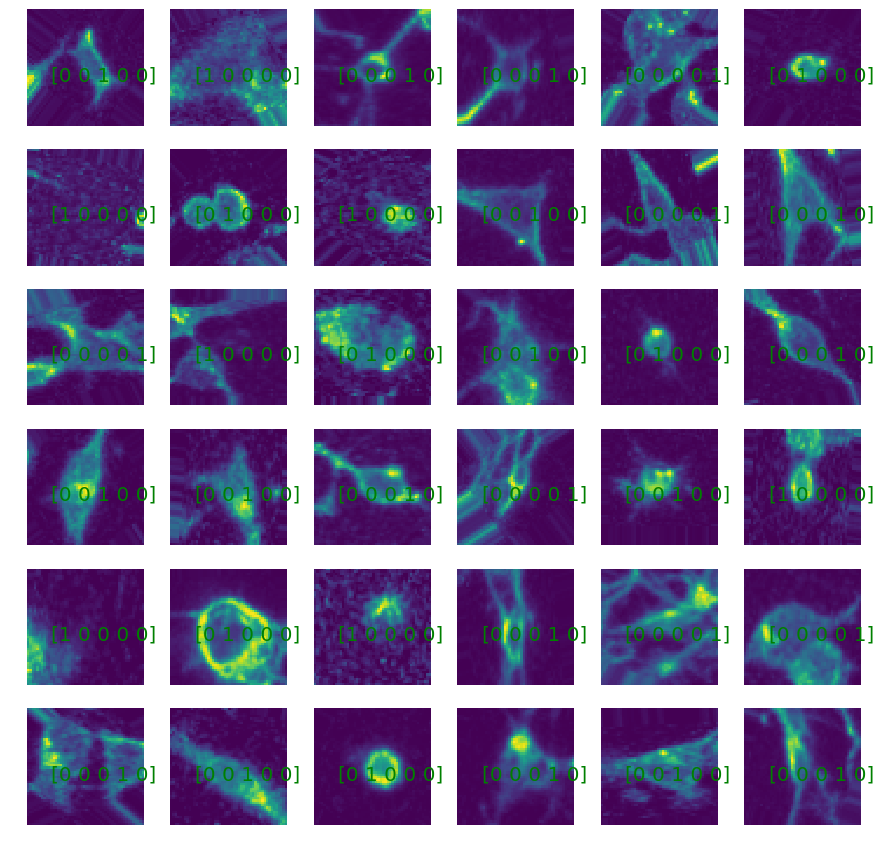

In [20]:
it = datagen.flow(train_X, train_y, batch_size=1)
plt.figure(figsize=(15,15))
plt.tight_layout()
# generate samples and plot
for i in range(36):
    # define subplot
    plt.subplot(6,6,i+1)
    plt.axis('off')
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0]
    label = batch[1][0]
    # plot raw pixel data
    print(np.min(image), np.max(image), np.mean(image), np.std(image))
    plt.imshow(image[0,:,:,0])
    plt.text(10,30,label, color='green', size=20)
# show the figure
plt.show()

In [ ]:
history = model.fit(datagen.flow(train_X, train_y, batch_size=32), epochs=10000, 
                    validation_data=(test_X, test_y),callbacks=[cp_callback,tensorboard_callback])

Epoch 1/10000
 1/22 [>.............................] - ETA: 1:29 - loss: 1.6118 - acc: 0.1562

W1121 15:26:27.876325 139688174204672 callbacks.py:257] Method (on_train_batch_end) is slow compared to the batch update (0.192879). Check your callbacks.


22/22 [==============================] - 6s 281ms/step - loss: 1.5850 - acc: 0.2200 - val_loss: 1.6078 - val_acc: 0.2686
Epoch 2/10000
22/22 [==============================] - 1s 62ms/step - loss: 1.4223 - acc: 0.3329 - val_loss: 1.6117 - val_acc: 0.1829
Epoch 3/10000
22/22 [==============================] - 1s 63ms/step - loss: 1.3513 - acc: 0.3329 - val_loss: 1.6151 - val_acc: 0.1829
Epoch 4/10000
22/22 [==============================] - 1s 66ms/step - loss: 1.3273 - acc: 0.3900 - val_loss: 1.6085 - val_acc: 0.1829
Epoch 5/10000
22/22 [==============================] - 1s 64ms/step - loss: 1.2798 - acc: 0.3957 - val_loss: 1.5980 - val_acc: 0.3943
Epoch 6/10000
22/22 [==============================] - 1s 63ms/step - loss: 1.2382 - acc: 0.4471 - val_loss: 1.6039 - val_acc: 0.1714
Epoch 7/10000
22/22 [==============================] - 1s 63ms/step - loss: 1.1786 - acc: 0.4900 - val_loss: 1.5862 - val_acc: 0.4571
Epoch 8/10000
22/22 [==============================] - 1s 64ms/step - loss:

Epoch 62/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.7316 - acc: 0.6971 - val_loss: 1.1087 - val_acc: 0.6343
Epoch 63/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.7553 - acc: 0.7029 - val_loss: 1.2595 - val_acc: 0.6000
Epoch 64/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.6982 - acc: 0.7029 - val_loss: 1.0893 - val_acc: 0.6114
Epoch 65/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.6986 - acc: 0.7143 - val_loss: 1.1508 - val_acc: 0.6514
Epoch 66/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.7461 - acc: 0.7229 - val_loss: 0.9974 - val_acc: 0.6400
Epoch 67/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.7172 - acc: 0.7114 - val_loss: 1.0266 - val_acc: 0.6457
Epoch 68/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.7159 - acc: 0.6986 - val_loss: 0.9583 - val_acc: 0.6171
Epoch 69/10000
22/22 [==============================] -

22/22 [==============================] - 2s 73ms/step - loss: 0.5020 - acc: 0.7900 - val_loss: 1.1149 - val_acc: 0.6800
Epoch 123/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.4753 - acc: 0.8143 - val_loss: 1.1741 - val_acc: 0.6571
Epoch 124/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.4698 - acc: 0.8157 - val_loss: 1.0742 - val_acc: 0.6514
Epoch 125/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.4804 - acc: 0.8171 - val_loss: 1.0340 - val_acc: 0.6400
Epoch 126/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.5285 - acc: 0.7814 - val_loss: 1.0686 - val_acc: 0.6400
Epoch 127/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.5509 - acc: 0.7600 - val_loss: 1.1048 - val_acc: 0.6114
Epoch 128/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.5060 - acc: 0.7886 - val_loss: 1.2729 - val_acc: 0.5943
Epoch 129/10000
22/22 [==============================] - 1s 64ms

22/22 [==============================] - 1s 63ms/step - loss: 0.3787 - acc: 0.8500 - val_loss: 1.2078 - val_acc: 0.6400
Epoch 183/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.3149 - acc: 0.8829 - val_loss: 1.4046 - val_acc: 0.6571
Epoch 184/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.2954 - acc: 0.8843 - val_loss: 1.5819 - val_acc: 0.6800
Epoch 185/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.3506 - acc: 0.8514 - val_loss: 1.3336 - val_acc: 0.6686
Epoch 186/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.3185 - acc: 0.8814 - val_loss: 1.3193 - val_acc: 0.6914
Epoch 187/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.3523 - acc: 0.8629 - val_loss: 1.2765 - val_acc: 0.6629
Epoch 188/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.3217 - acc: 0.8743 - val_loss: 1.3234 - val_acc: 0.6571
Epoch 189/10000
22/22 [==============================] - 1s 64ms

22/22 [==============================] - 1s 63ms/step - loss: 0.2435 - acc: 0.9086 - val_loss: 1.8485 - val_acc: 0.6229
Epoch 243/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.1767 - acc: 0.9300 - val_loss: 1.7998 - val_acc: 0.6114
Epoch 244/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.1633 - acc: 0.9386 - val_loss: 2.3020 - val_acc: 0.5771
Epoch 245/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.2669 - acc: 0.8971 - val_loss: 1.3419 - val_acc: 0.6400
Epoch 246/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.2721 - acc: 0.8957 - val_loss: 1.6035 - val_acc: 0.6857
Epoch 247/10000
22/22 [==============================] - 1s 62ms/step - loss: 0.1810 - acc: 0.9257 - val_loss: 1.9759 - val_acc: 0.6686
Epoch 248/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.2113 - acc: 0.9157 - val_loss: 1.7727 - val_acc: 0.6114
Epoch 249/10000
22/22 [==============================] - 1s 63ms

22/22 [==============================] - 1s 63ms/step - loss: 0.1374 - acc: 0.9471 - val_loss: 2.1049 - val_acc: 0.6457
Epoch 303/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.1690 - acc: 0.9443 - val_loss: 1.9480 - val_acc: 0.6057
Epoch 304/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.2392 - acc: 0.9157 - val_loss: 1.8950 - val_acc: 0.6343
Epoch 305/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.1460 - acc: 0.9486 - val_loss: 1.8808 - val_acc: 0.6514
Epoch 306/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.1507 - acc: 0.9500 - val_loss: 2.1313 - val_acc: 0.6229
Epoch 307/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.1645 - acc: 0.9471 - val_loss: 1.7783 - val_acc: 0.6571
Epoch 308/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.1353 - acc: 0.9471 - val_loss: 1.9790 - val_acc: 0.6171
Epoch 309/10000
22/22 [==============================] - 1s 64ms

22/22 [==============================] - 1s 63ms/step - loss: 0.1417 - acc: 0.9514 - val_loss: 2.0650 - val_acc: 0.6514
Epoch 363/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.1758 - acc: 0.9529 - val_loss: 1.6612 - val_acc: 0.6457
Epoch 364/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.1732 - acc: 0.9400 - val_loss: 1.7422 - val_acc: 0.5886
Epoch 365/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.2115 - acc: 0.9314 - val_loss: 1.8355 - val_acc: 0.6114
Epoch 366/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.1578 - acc: 0.9400 - val_loss: 1.9398 - val_acc: 0.6171
Epoch 367/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.1445 - acc: 0.9400 - val_loss: 1.9922 - val_acc: 0.5771
Epoch 368/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.1115 - acc: 0.9600 - val_loss: 2.1002 - val_acc: 0.6400
Epoch 369/10000
22/22 [==============================] - 1s 63ms

22/22 [==============================] - 1s 64ms/step - loss: 0.0855 - acc: 0.9743 - val_loss: 1.9831 - val_acc: 0.6400
Epoch 423/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.1679 - acc: 0.9414 - val_loss: 1.7745 - val_acc: 0.6400
Epoch 424/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.1079 - acc: 0.9643 - val_loss: 2.1256 - val_acc: 0.6800
Epoch 425/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.0679 - acc: 0.9786 - val_loss: 2.1366 - val_acc: 0.6686
Epoch 426/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0830 - acc: 0.9729 - val_loss: 2.1066 - val_acc: 0.6114
Epoch 427/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0634 - acc: 0.9786 - val_loss: 2.1451 - val_acc: 0.6286
Epoch 428/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.1141 - acc: 0.9686 - val_loss: 2.2699 - val_acc: 0.5943
Epoch 429/10000
22/22 [==============================] - 1s 63ms

22/22 [==============================] - 1s 63ms/step - loss: 0.0589 - acc: 0.9743 - val_loss: 2.2591 - val_acc: 0.6571
Epoch 483/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0522 - acc: 0.9871 - val_loss: 2.2828 - val_acc: 0.6400
Epoch 484/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.0945 - acc: 0.9671 - val_loss: 2.2275 - val_acc: 0.6229
Epoch 485/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.1013 - acc: 0.9571 - val_loss: 1.7655 - val_acc: 0.6400
Epoch 486/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0861 - acc: 0.9757 - val_loss: 2.1942 - val_acc: 0.6171
Epoch 487/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.1239 - acc: 0.9571 - val_loss: 2.0045 - val_acc: 0.6229
Epoch 488/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.1381 - acc: 0.9557 - val_loss: 1.9412 - val_acc: 0.6171
Epoch 489/10000
22/22 [==============================] - 1s 64ms

22/22 [==============================] - 1s 63ms/step - loss: 0.0655 - acc: 0.9829 - val_loss: 2.1114 - val_acc: 0.6457
Epoch 543/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.0543 - acc: 0.9857 - val_loss: 2.1980 - val_acc: 0.6286
Epoch 544/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0391 - acc: 0.9929 - val_loss: 2.7607 - val_acc: 0.6000
Epoch 545/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.1091 - acc: 0.9714 - val_loss: 2.4510 - val_acc: 0.6000
Epoch 546/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0560 - acc: 0.9871 - val_loss: 2.1224 - val_acc: 0.5829
Epoch 547/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0596 - acc: 0.9800 - val_loss: 2.4004 - val_acc: 0.6229
Epoch 548/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.0585 - acc: 0.9771 - val_loss: 2.3437 - val_acc: 0.6400
Epoch 549/10000
22/22 [==============================] - 1s 64ms

22/22 [==============================] - 1s 65ms/step - loss: 0.0674 - acc: 0.9743 - val_loss: 2.1224 - val_acc: 0.6229
Epoch 603/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.0644 - acc: 0.9786 - val_loss: 2.0551 - val_acc: 0.6114
Epoch 604/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0816 - acc: 0.9729 - val_loss: 2.6741 - val_acc: 0.5771
Epoch 605/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0923 - acc: 0.9757 - val_loss: 2.2589 - val_acc: 0.6343
Epoch 606/10000
22/22 [==============================] - 1s 65ms/step - loss: 0.0672 - acc: 0.9829 - val_loss: 1.9237 - val_acc: 0.6286
Epoch 607/10000
22/22 [==============================] - 1s 62ms/step - loss: 0.0653 - acc: 0.9829 - val_loss: 1.9897 - val_acc: 0.6343
Epoch 608/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0673 - acc: 0.9771 - val_loss: 2.0914 - val_acc: 0.6286
Epoch 609/10000
22/22 [==============================] - 1s 63ms

22/22 [==============================] - 1s 64ms/step - loss: 0.0534 - acc: 0.9814 - val_loss: 2.2078 - val_acc: 0.6286
Epoch 663/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0840 - acc: 0.9729 - val_loss: 2.2064 - val_acc: 0.6057
Epoch 664/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0721 - acc: 0.9786 - val_loss: 2.1347 - val_acc: 0.6229
Epoch 665/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0846 - acc: 0.9800 - val_loss: 1.9016 - val_acc: 0.6229
Epoch 666/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.0605 - acc: 0.9843 - val_loss: 2.1379 - val_acc: 0.6171
Epoch 667/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0484 - acc: 0.9771 - val_loss: 2.2566 - val_acc: 0.6286
Epoch 668/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0579 - acc: 0.9814 - val_loss: 2.1008 - val_acc: 0.6457
Epoch 669/10000
22/22 [==============================] - 1s 63ms

22/22 [==============================] - 1s 63ms/step - loss: 0.0640 - acc: 0.9743 - val_loss: 2.7961 - val_acc: 0.5943
Epoch 723/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.0530 - acc: 0.9843 - val_loss: 2.4847 - val_acc: 0.5714
Epoch 724/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.0356 - acc: 0.9914 - val_loss: 2.8482 - val_acc: 0.5657
Epoch 725/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.0270 - acc: 0.9900 - val_loss: 2.8512 - val_acc: 0.6057
Epoch 726/10000
22/22 [==============================] - 1s 63ms/step - loss: 0.1004 - acc: 0.9729 - val_loss: 2.6069 - val_acc: 0.5886
Epoch 727/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0935 - acc: 0.9629 - val_loss: 2.5539 - val_acc: 0.5771
Epoch 728/10000
22/22 [==============================] - 1s 64ms/step - loss: 0.0777 - acc: 0.9757 - val_loss: 2.7548 - val_acc: 0.5886
Epoch 729/10000
22/22 [==============================] - 1s 62ms

In [ ]:
import sklearn
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve_1.png')

def plot_accuracy_curve(history):    
    plt.plot(history.history['acc'], label='acc')
    plt.plot(history.history['val_acc'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1])
    plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

plot_accuracy_curve(history)
y_pred = model.predict(test_X)
map_characters = {0:'Dead',1:'1',2:'2',3:'3',4:'Complex'}
print('\n', sklearn.metrics.classification_report(np.where(test_y > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(test_y,axis=1)
# plotKerasLearningCurve()
# plt.show()  
plot_learning_curve(history)
plt.show()
confusion_mtx = sklearn.metrics.confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values())) 
plt.show()


In [ ]:
ut = model.predict(test_X)

In [ ]:
ut

In [ ]:
predicted

In [ ]:
classWeights = [ ut[i]-test_ for i in range(0, len(ut) ) ]
